# NLP Assignment

Submission:
* There is no late submission for this assignment.
* It is individual work.
* Each student should submit an .ipynb file to the Teams Assignment.
* Grading: 0-15% of the course.

## Task
Here is a <a href="https://huggingface.co/datasets/banking77">dataset</a> composed of online banking queries annotated with their corresponding intents. You can download it by running the cell below. The data will be saved in the working directory.

DO NOT USE function ```datasets.load('banking77')```! Run the cell below and work with raw data.

What I expect you to do:
* Explore data: shape, number of classes, balance of classes. __2 points__.
* Solve a classification problem for a dataset using any <a href="https://huggingface.co/docs/transformers/tasks/sequence_classification">transformer</a> from the huggingface library. __3 points__.  
The tutorial at the link might be helpful.
* Justify choice of a metric. __3 points__.
* Split the training dataset into train and valid datasets. Train the model on train dataset and evaluate it on the valid dataset during training. Evaluate model on the test dataset after training. DO NOT USE a test dataset for validation!  __2 points__.
* Come up with 3 or more queries on banking topics and make a forecast of intents using your model. __2 points__.
* Comment code and describe your actions in the notebook. __1 point__.
* You must achieve a metric value of at least 90% __2 points__.
* Attach this file to the Teams Assignment. If you do not attach the file, you will get __0 points__.

The final score is calculated as a sum of all points.

If any of the tasks below will be completed with an error, the number of points for it may be reduced. For example, if you wrote only one query to the model instead of at least 3, then instead of __2 points__ you will get __1 point__.

## Notes
* Feel free to ask questions.
* Google Colab and Kaggle provide some free CPU and GPU time. Feel free to use it or use university resources.
* Good luck!

In [1]:
%%bash
pip install transformers evaluate accelerate
wget -q -nc "https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv"
wget -q -nc "https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/test.csv"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Get the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
print("trainset Shape:", train_data.shape)

# Data Exploration
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)
print("Class Distribution:")
print(train_data['category'].value_counts(normalize=True) * 100)
print("Class Distribution:")
print(test_data['category'].value_counts(normalize=True) * 100)


trainset Shape: (10003, 2)
Training Data Shape: (10003, 2)
Testing Data Shape: (3080, 2)
Class Distribution:
category
card_payment_fee_charged                            1.869439
direct_debit_payment_not_recognised                 1.819454
balance_not_updated_after_cheque_or_cash_deposit    1.809457
wrong_amount_of_cash_received                       1.799460
cash_withdrawal_charge                              1.769469
                                                      ...   
lost_or_stolen_card                                 0.819754
card_swallowed                                      0.609817
card_acceptance                                     0.589823
virtual_card_not_working                            0.409877
contactless_not_working                             0.349895
Name: proportion, Length: 77, dtype: float64
Class Distribution:
category
card_arrival                      1.298701
transaction_charged_twice         1.298701
receiving_money                   1.298701
transfer

In [3]:
# Display basic information about training data
print(f"{'Training Data:'}\n{train_data.info()}\n{train_data.head()}")

# Display basic information about testing data
print(f"\n{'Testing Data:'}\n{test_data.info()}\n{test_data.head()}")

# Check and display null values in training data
print(f"\n{'Null values in training data:'}\n{train_data.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10003 non-null  object
 1   category  10003 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB
Training Data:
None
                                                text      category
0                     I am still waiting on my card?  card_arrival
1  What can I do if my card still hasn't arrived ...  card_arrival
2  I have been waiting over a week. Is the card s...  card_arrival
3  Can I track my card while it is in the process...  card_arrival
4  How do I know if I will get my card, or if it ...  card_arrival
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      3080 non-null   object
 1   category  3080 non-null   object
dtypes: object(2)


##Explore dataset


In [4]:
# Looking at first 10 rows
train_data.head(10)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival
5,When did you send me my new card?,card_arrival
6,Do you have info about the card on delivery?,card_arrival
7,What do I do if I still have not received my n...,card_arrival
8,Does the package with my card have tracking?,card_arrival
9,I ordered my card but it still isn't here,card_arrival


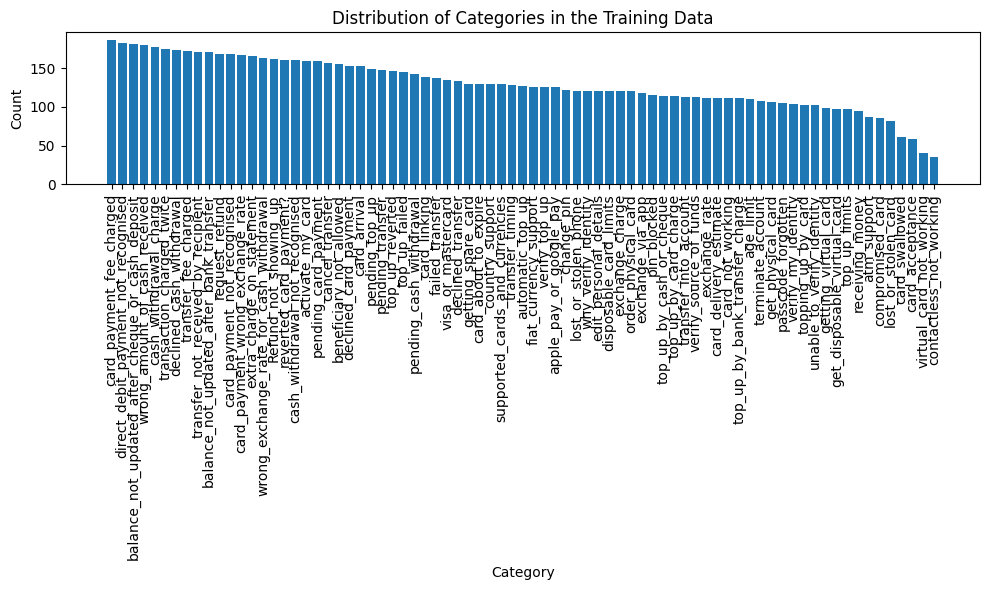

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the distribution of categories.
category_counts = train_data['category'].value_counts()

# Create a bar plot of the category distribution.
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in the Training Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##Balance class

In [6]:
# Checking of class distribution
import seaborn as sns
class_counts = train_data['category'].value_counts()

pd.DataFrame(class_counts)

,count
category,
card_payment_fee_charged,187
direct_debit_payment_not_recognised,182
balance_not_updated_after_cheque_or_cash_deposit,181
wrong_amount_of_cash_received,180
cash_withdrawal_charge,177
...,...
lost_or_stolen_card,82
card_swallowed,61
card_acceptance,59


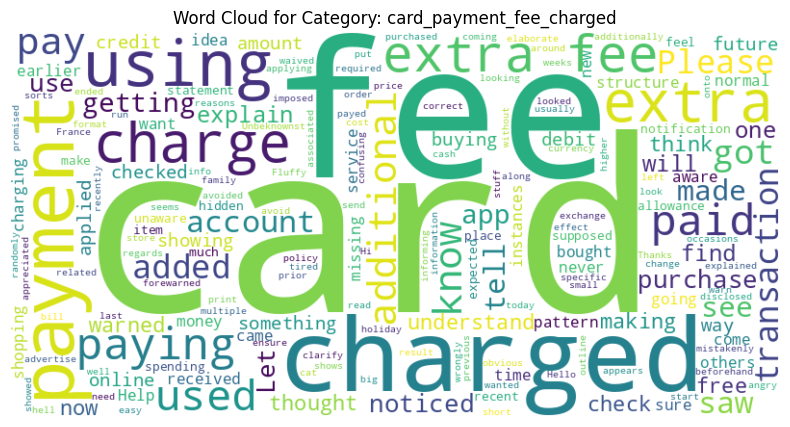

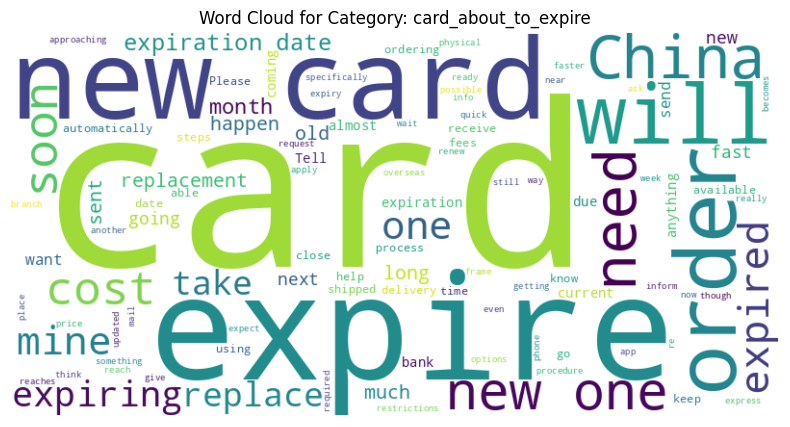

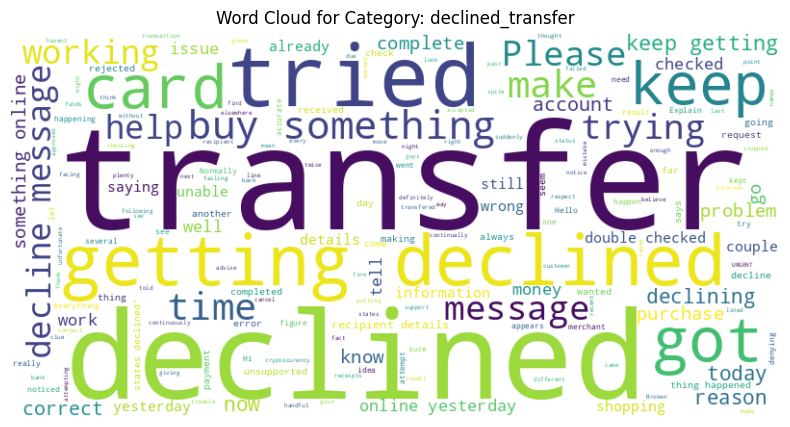

[None, None, None]

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(data, category):
    """Generates and displays a word cloud for a specific category."""
    text = ' '.join(data[data['category'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category: {category}')
    plt.show()

# Categories to visualize
categories = ('card_payment_fee_charged', 'card_about_to_expire', 'declined_transfer')

# Generate word clouds using a list comprehension
[generate_word_cloud(train_data, category) for category in categories]

## Tokenizing and modeling part

In [8]:
from datasets import Dataset, DatasetDict
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder

# Initialize tokenizer and label encoder
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
label_encoder = LabelEncoder()

# Encode labels
train_data["category_encoded"] = label_encoder.fit_transform(train_data["category"])
test_data["category_encoded"] = label_encoder.transform(test_data["category"])

# Convert pandas DataFrames to HuggingFace Datasets
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)

# Split training dataset into training and validation sets
train_valid_split = train_dataset.train_test_split(test_size=0.2, seed=42)
datasets = DatasetDict({
    "train": train_valid_split["train"],
    "validation": train_valid_split["test"],
    "test": test_dataset,
})

# Preprocessing function for tokenization
def preprocess_function(examples):
    tokenized_examples = tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    tokenized_examples["labels"] = examples["category_encoded"]
    return tokenized_examples

# Apply tokenization
tokenized_datasets = datasets.map(
    preprocess_function,
    batched=True,
    remove_columns=["text", "category", "category_encoded"],
    load_from_cache_file=False
)

# Set format for PyTorch
tokenized_datasets.set_format("torch")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/8002 [00:00<?, ? examples/s]

Map:   0%|          | 0/2001 [00:00<?, ? examples/s]

Map:   0%|          | 0/3080 [00:00<?, ? examples/s]

In [15]:
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
import evaluate
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import torch


# the number of labels based on the encoded categories
num_labels = len(label_encoder.classes_)

# Initialize the model using BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=num_labels
)

# training arguments
training_args = TrainingArguments(
    output_dir="./my_NLP_task",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    num_train_epochs=8,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    push_to_hub=False,
    report_to="none",
    fp16=True,
    gradient_accumulation_steps=2,
    warmup_ratio=0.1,
)

# Metric computation function
def compute_metrics(eval_pred):
    """
    Compute evaluation metrics including accuracy, weighted F1 score, and ROC AUC.
    """
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    # Accuracy
    acc = evaluate.load("accuracy").compute(predictions=predictions, references=labels)["accuracy"]

    # Weighted F1 Score
    f1 = f1_score(labels, predictions, average="weighted")

    # ROC AUC
    num_labels = logits.shape[1]
    one_hot_labels = np.eye(num_labels)[labels]
    probs = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy() # Probabilities from logits
    roc_auc = roc_auc_score(one_hot_labels, probs, average="weighted", multi_class="ovr")

    return {"accuracy": acc, "f1": f1, "roc_auc": roc_auc}

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


##Now we wil train the model

In [16]:
# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [25]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Roc Auc
0,0.178700,0.377255,0.912044,0.912289,0.998144
2,0.063500,0.335093,0.926037,0.926009,0.998087
4,0.021400,0.352543,0.931034,0.931031,0.998170
6,0.009400,0.359720,0.931034,0.931220,0.998112
7,0.006600,0.364717,0.932034,0.932061,0.998123


TrainOutput(global_step=2664, training_loss=0.05593991136407709, metrics={'train_runtime': 625.2544, 'train_samples_per_second': 102.384, 'train_steps_per_second': 4.261, 'total_flos': 4207477606817280.0, 'train_loss': 0.05593991136407709, 'epoch': 7.988005997001499})

In [26]:
# Evaluate the model on the test set
test_results = trainer.evaluate(tokenized_datasets["test"])
print(test_results)

{'eval_loss': 0.3421855866909027, 'eval_accuracy': 0.9327922077922078, 'eval_f1': 0.9329997586283268, 'eval_roc_auc': 0.9979920326384142, 'eval_runtime': 6.6856, 'eval_samples_per_second': 460.69, 'eval_steps_per_second': 38.441, 'epoch': 7.988005997001499}


In [27]:
# Save the trained model
trainer.save_model("./my_finetuned_model")

In [35]:
# Prepare the new data as a dictionary (same format as the training data)
new_data = ["How can I transfer funds?",
    "Why was I charged a fee for my card payment?",
    "I lost my card, what should I do?",
    "How do I set up a direct debit?",
    "I need help with my mobile banking app",
    "Can you help me recover my password?",
    "What is the interest rate on a personal loan?",
    "How can I apply for a new credit card?",
    "Is there a way to increase my credit limit?",
    "Can I get a statement for the last month?",
    "I need assistance with my credit card transaction",
    "How can I cancel a standing order?",
    "I need to update my contact information",
    "Can I open a savings account online?"]
new_data_dict = {"text": new_data}

# Convert the dictionary into a HuggingFace Dataset
new_data_dataset = Dataset.from_dict(new_data_dict)

# Preprocess the new data using the same preprocessing function
def preprocess_function(examples):
    tokenized_examples = tokenizer(
        examples["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    return tokenized_examples

# Apply tokenization
new_data_tokenized = new_data_dataset.map(preprocess_function, batched=True)

# Make predictions using the trained model
predictions = trainer.predict(new_data_tokenized)

# Get the predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

predicted_categories = label_encoder.inverse_transform(predicted_labels)

# Print each query with its corresponding predicted category
for query, category in zip(new_data, predicted_categories):
    print(f"Banking Query: {query}\nPredicted Category: {category}\n")

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

Banking Query: How can I transfer funds?
Predicted Category: transfer_into_account

Banking Query: Why was I charged a fee for my card payment?
Predicted Category: card_payment_fee_charged

Banking Query: I lost my card, what should I do?
Predicted Category: lost_or_stolen_card

Banking Query: How do I set up a direct debit?
Predicted Category: direct_debit_payment_not_recognised

Banking Query: I need help with my mobile banking app
Predicted Category: lost_or_stolen_phone

Banking Query: Can you help me recover my password?
Predicted Category: passcode_forgotten

Banking Query: What is the interest rate on a personal loan?
Predicted Category: exchange_charge

Banking Query: How can I apply for a new credit card?
Predicted Category: supported_cards_and_currencies

Banking Query: Is there a way to increase my credit limit?
Predicted Category: top_up_limits

Banking Query: Can I get a statement for the last month?
Predicted Category: unable_to_verify_identity

Banking Query: I need assi

I used BertForSequenceClassification, which is a pre-trained BERT model fine-tuned for text classification tasks. It is configured with the appropriate number of output labels based on the dataset. For metrcis I used Accuracy, F1 Score, and ROC AUC.The model is trained using the Trainer class. After training, the model is evaluated on the test set, and the evaluation results are printed. These results will show the overall performance of the model on unseen data.
Prediction on New Queries: After training, new data is tokenized and passed through the model for prediction. The predicted labels are then decoded back into the original categories (labels) using the LabelEncoder.

The overall code demonstrates a well-organized process for training a BERT-based model for text classification tasks, including the entire pipeline from data preprocessing to model evaluation and inference.